# Pytorch Linear Regression
---  
by Pranpaveen Lay.

# Simple Linear Regression

In [1]:
import torch
from matplotlib import pyplot as plt

In [2]:
data_x = torch.linspace(0,5,100)
data_y = 4 * data_x + 7 +torch.randn(data_x.shape)*2.5

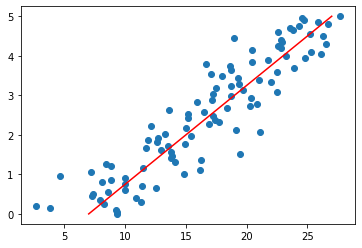

In [3]:
plt.scatter(data_y,data_x)
plt.plot( 4 * data_x + 7,data_x,'r')

In [4]:
data = torch.stack([data_x,data_y],dim=1)
data.shape

torch.Size([100, 2])

In [5]:
#Linear model y = m*x+c // y = w*x + b
#model
def model(x,w,b):
    return w*x+b

$J(\cdot) = mean((y-y_{pred})^{2})$

In [6]:
def loss_fn(y,y_pred):
    return ((y-y_pred)**2).mean()

In [7]:
w = torch.rand(())
b = torch.rand(())

In [8]:
w,b

(tensor(0.3530), tensor(0.8220))

In [9]:
n_epochs = 1000
lr = 0.01

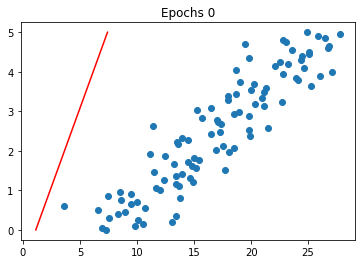

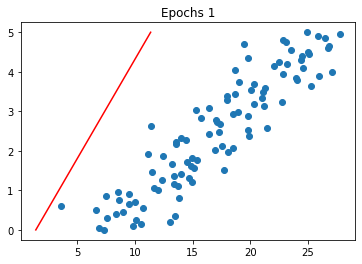

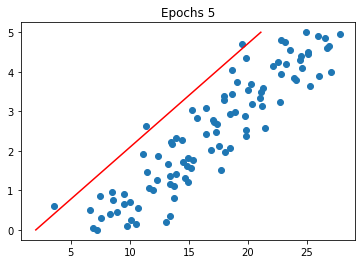

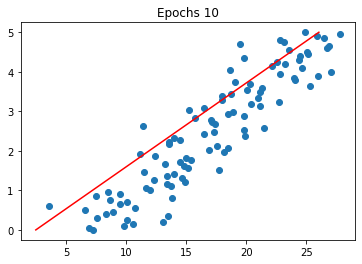

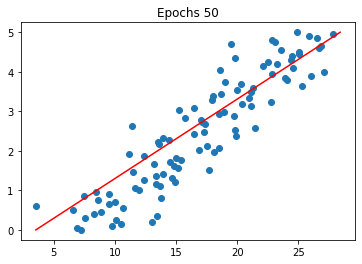

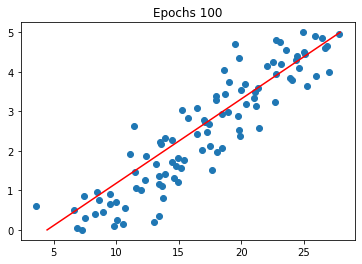

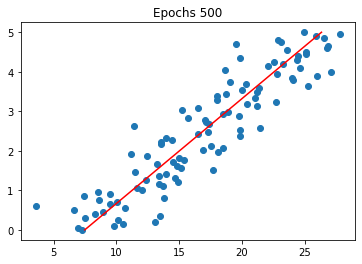

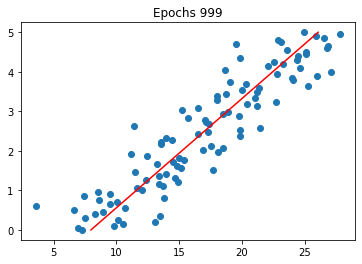

In [10]:
loss_log = []
for epoch in range(n_epochs):
    y_pred = model(data_x, w, b)
    loss = loss_fn(data_y,y_pred)
    loss_log.append(loss)
    d_w = (-2*data_x*(data_y-y_pred)).mean()
    d_b = (-2*(data_y-y_pred)).mean()
    w = w - lr*d_w
    b = b - lr*d_b
    if epoch in [0,1,5,10,50,100,500,999] :
        plt.figure()
        plt.scatter(data_y,data_x)
        plt.plot( w * data_x + b,data_x,'r')
        plt.title(f'Epochs {epoch}')

In [11]:
w,b

(tensor(3.6186), tensor(7.9665))

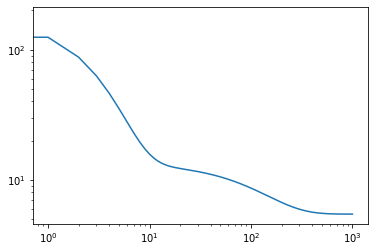

In [12]:
plt.plot(loss_log[1:])
plt.yscale('log')
plt.xscale('log')

# Torch grad

In [13]:
params = torch.rand(2,requires_grad=True)
params # [w, b]

tensor([0.0385, 0.1915], requires_grad=True)

In [14]:
params.grad is None

True

In [15]:
y_pred = model(data_x, *params)
loss = loss_fn(data_y, y_pred)

In [16]:
loss

tensor(312.5963, grad_fn=<MeanBackward0>)

In [17]:
loss.backward()

In [18]:
params.grad

tensor([-98.8368, -33.4754])

In [19]:
params.grad.zero_()

tensor([0., 0.])

In [20]:
params.grad

tensor([0., 0.])

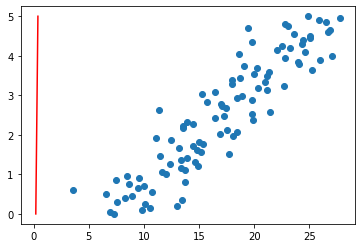

In [21]:
plt.scatter(data_y,data_x)
with torch.no_grad():
    plt.plot(model(data_x,*params),data_x,'r')

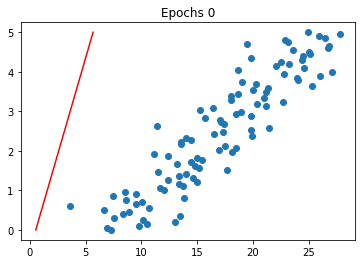

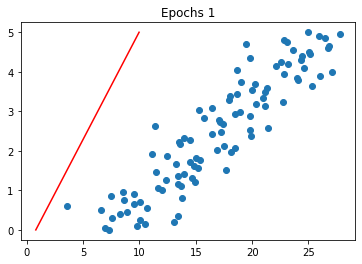

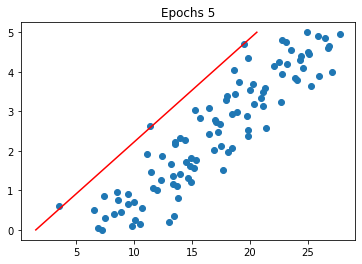

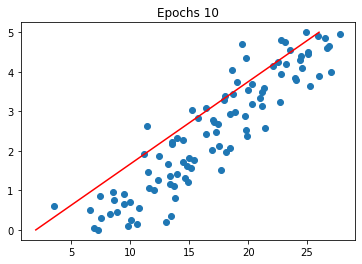

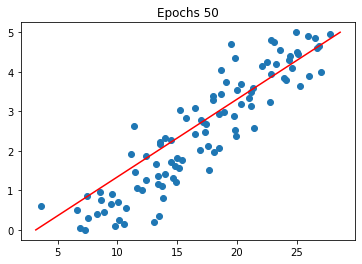

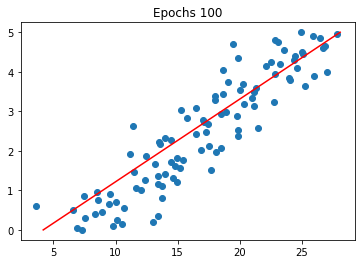

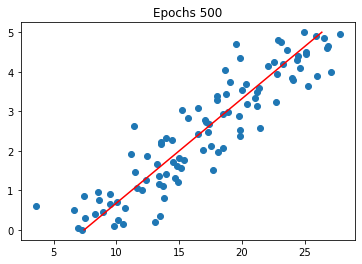

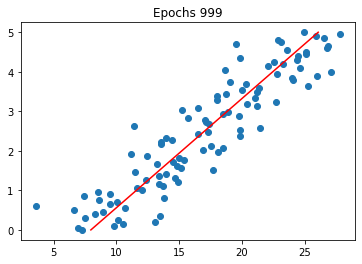

In [22]:
loss_log = []
for epoch in range(n_epochs):
    if params.grad is not None:
        params.grad.zero_()
    y_pred = model(data_x, *params)
    loss = loss_fn(data_y, y_pred)
    loss.backward()
    with torch.no_grad():
        params -= lr * params.grad
    loss_log.append(loss.item())
    if epoch in [0,1,5,10,50,100,500,999] :
        plt.figure()
        plt.scatter(data_y,data_x)
        with torch.no_grad():
            plt.plot(model(data_x,*params),data_x,'r')
        plt.title(f'Epochs {epoch}')

In [23]:
params

tensor([3.6200, 7.9619], requires_grad=True)

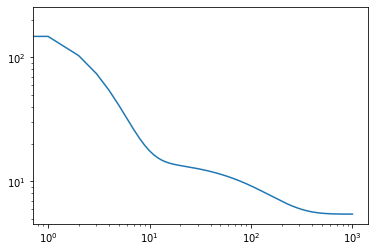

In [24]:
plt.plot(loss_log[1:])
plt.yscale('log')
plt.xscale('log')

# Torch grad with optimizer

In [25]:
dir(torch.optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [26]:
params = torch.rand(2,requires_grad=True)
params # [w, b]

tensor([0.7967, 0.3980], requires_grad=True)

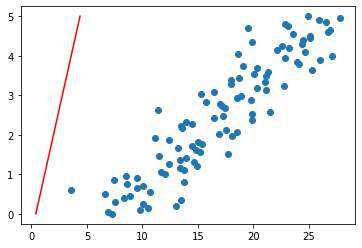

In [27]:
plt.scatter(data_y,data_x)
with torch.no_grad():
    plt.plot(model(data_x,*params),data_x,'r')

In [28]:
lr = 0.01

In [29]:
optimizer = torch.optim.SGD([params], lr=lr)

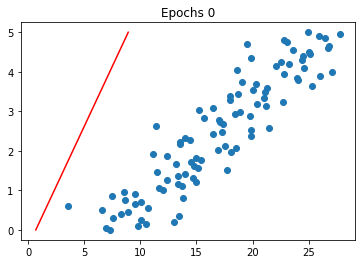

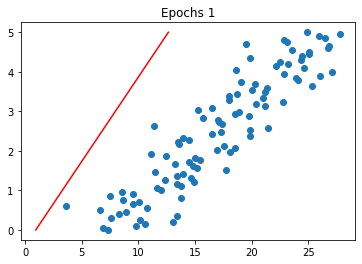

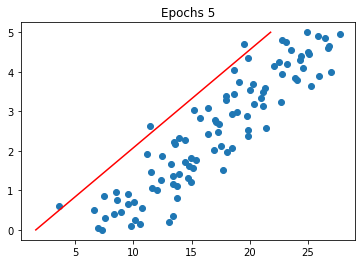

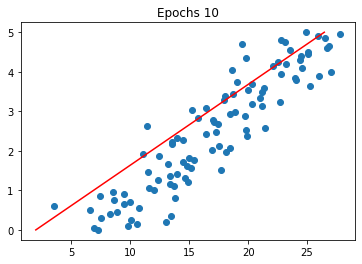

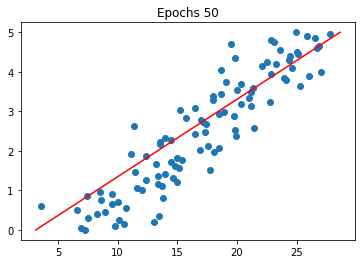

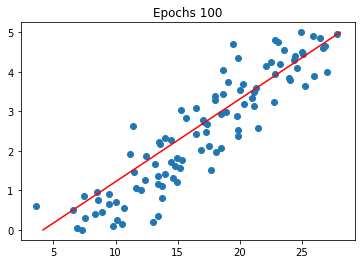

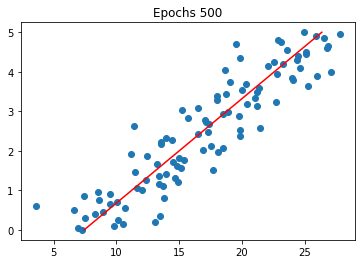

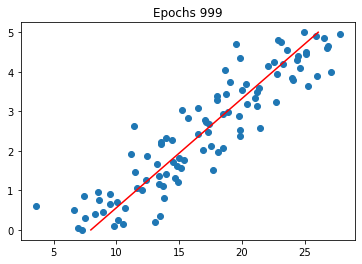

In [30]:
loss_log = []
for epoch in range(n_epochs):
    optimizer.zero_grad()
    y_pred = model(data_x, *params)
    loss = loss_fn(data_y, y_pred)
    loss.backward()
#     with torch.no_grad():
#         params -= lr * params.grad
    optimizer.step()
    loss_log.append(loss.item())
    
    
    if epoch in [0,1,5,10,50,100,500,999] :
        plt.figure()
        plt.scatter(data_y,data_x)
        with torch.no_grad():
            plt.plot(model(data_x,*params),data_x,'r')
        plt.title(f'Epochs {epoch}')

In [31]:
params

tensor([3.6201, 7.9617], requires_grad=True)

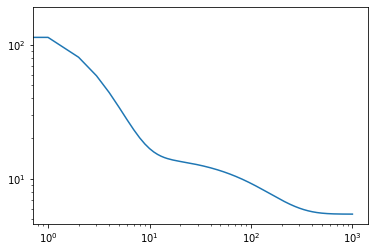

In [32]:
plt.plot(loss_log[1:])
plt.yscale('log')
plt.xscale('log')

# Torch nn

In [33]:
dir(torch.nn)

['AdaptiveAvgPool1d',
 'AdaptiveAvgPool2d',
 'AdaptiveAvgPool3d',
 'AdaptiveLogSoftmaxWithLoss',
 'AdaptiveMaxPool1d',
 'AdaptiveMaxPool2d',
 'AdaptiveMaxPool3d',
 'AlphaDropout',
 'AvgPool1d',
 'AvgPool2d',
 'AvgPool3d',
 'BCELoss',
 'BCEWithLogitsLoss',
 'BatchNorm1d',
 'BatchNorm2d',
 'BatchNorm3d',
 'Bilinear',
 'CELU',
 'CTCLoss',
 'ChannelShuffle',
 'ConstantPad1d',
 'ConstantPad2d',
 'ConstantPad3d',
 'Container',
 'Conv1d',
 'Conv2d',
 'Conv3d',
 'ConvTranspose1d',
 'ConvTranspose2d',
 'ConvTranspose3d',
 'CosineEmbeddingLoss',
 'CosineSimilarity',
 'CrossEntropyLoss',
 'CrossMapLRN2d',
 'DataParallel',
 'Dropout',
 'Dropout2d',
 'Dropout3d',
 'ELU',
 'Embedding',
 'EmbeddingBag',
 'FeatureAlphaDropout',
 'Flatten',
 'Fold',
 'FractionalMaxPool2d',
 'FractionalMaxPool3d',
 'GELU',
 'GLU',
 'GRU',
 'GRUCell',
 'GaussianNLLLoss',
 'GroupNorm',
 'Hardshrink',
 'Hardsigmoid',
 'Hardswish',
 'Hardtanh',
 'HingeEmbeddingLoss',
 'Identity',
 'InstanceNorm1d',
 'InstanceNorm2d',
 'Inst

In [46]:
model2 = torch.nn.Linear(1,1)
model2

Linear(in_features=1, out_features=1, bias=True)

In [47]:
data_x.shape

torch.Size([100])

In [48]:
#[batch, feature]
data_x2 = data_x.reshape(100,1) # or (-1,1)
data_x2.shape

torch.Size([100, 1])

In [49]:
pred = model2(data_x2)
pred.shape

torch.Size([100, 1])

In [50]:
list(model2.named_parameters())

[('weight',
  Parameter containing:
  tensor([[-0.1097]], requires_grad=True)),
 ('bias',
  Parameter containing:
  tensor([-0.5464], requires_grad=True))]

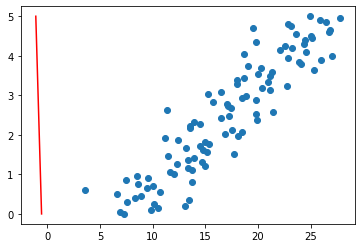

In [51]:
plt.scatter(data_y,data_x)
with torch.no_grad():
    plt.plot(model2(data_x2),data_x,'r')

In [52]:
optimizer = torch.optim.SGD(model2.parameters(), lr=lr)

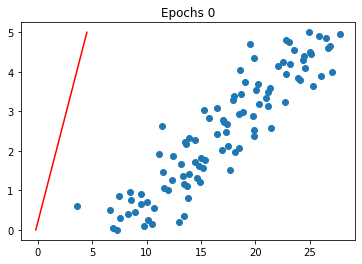

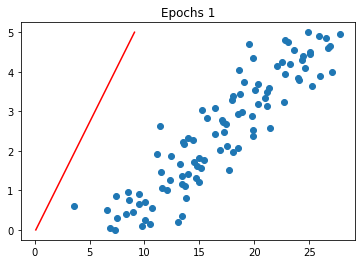

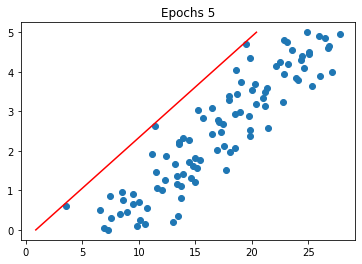

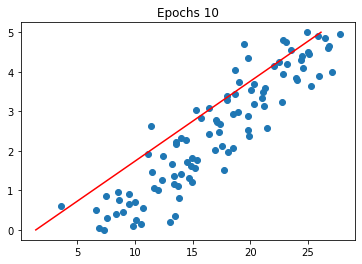

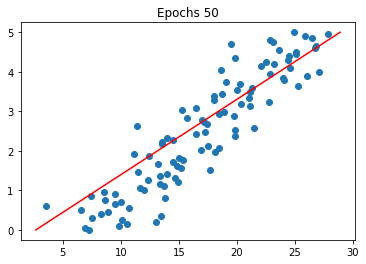

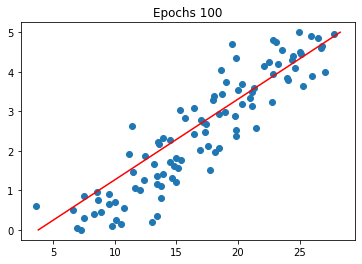

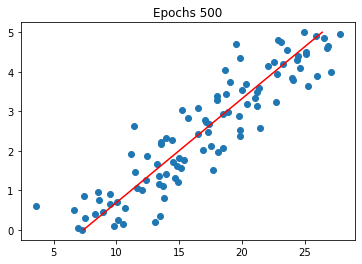

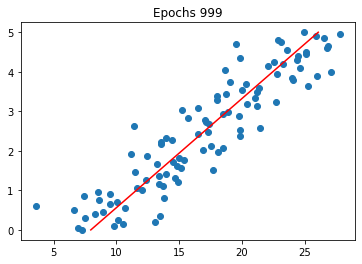

In [53]:
loss_log = []
for epoch in range(n_epochs):
    optimizer.zero_grad()
    y_pred = model2(data_x2)
    loss = loss_fn(data_y, y_pred.reshape(-1))
    loss.backward()

    optimizer.step()
    loss_log.append(loss.item())
    
    
    if epoch in [0,1,5,10,50,100,500,999] :
        plt.figure()
        plt.scatter(data_y,data_x)
        with torch.no_grad():
            plt.plot(model2(data_x2),data_x,'r')
        plt.title(f'Epochs {epoch}')

In [42]:
list(model2.named_parameters())

[('weight',
  Parameter containing:
  tensor([[3.6176]], requires_grad=True)),
 ('bias',
  Parameter containing:
  tensor([7.9699], requires_grad=True))]

# MLP / Basic NN

In [63]:
model3 = torch.nn.Sequential(
                            torch.nn.Linear(1,5),
                            torch.nn.Tanh(),
                            torch.nn.Linear(5,1)
)
model3

Sequential(
  (0): Linear(in_features=1, out_features=5, bias=True)
  (1): Tanh()
  (2): Linear(in_features=5, out_features=1, bias=True)
)

In [64]:
list(model3.named_parameters())

[('0.weight',
  Parameter containing:
  tensor([[ 0.2431],
          [-0.4645],
          [ 0.7158],
          [ 0.5889],
          [ 0.1365]], requires_grad=True)),
 ('0.bias',
  Parameter containing:
  tensor([ 0.3980,  0.0612, -0.4606,  0.4256, -0.6733], requires_grad=True)),
 ('2.weight',
  Parameter containing:
  tensor([[-0.1284, -0.3649,  0.2163, -0.1847,  0.3630]], requires_grad=True)),
 ('2.bias',
  Parameter containing:
  tensor([0.2358], requires_grad=True))]

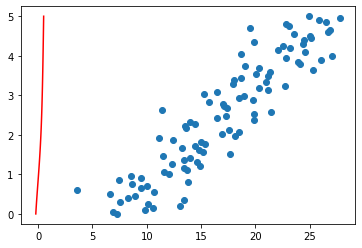

In [65]:
plt.scatter(data_y,data_x)
with torch.no_grad():
    plt.plot(model3(data_x2),data_x,'r')

In [66]:
optimizer = torch.optim.SGD(model3.parameters(), lr=lr)

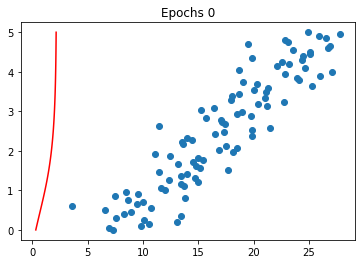

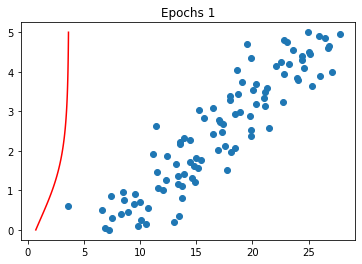

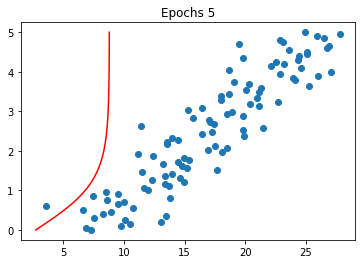

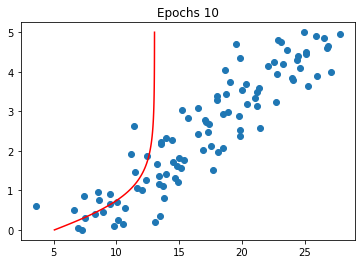

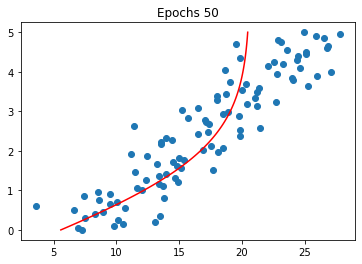

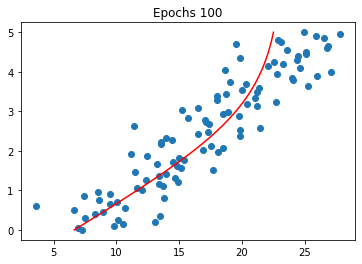

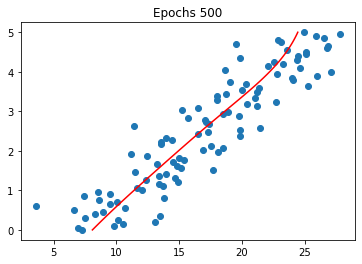

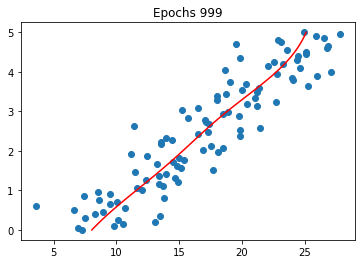

In [67]:
loss_log = []
for epoch in range(n_epochs):
    optimizer.zero_grad()
    y_pred = model3(data_x2)
    loss = loss_fn(data_y, y_pred.reshape(-1))
    loss.backward()

    optimizer.step()
    loss_log.append(loss.item())
    
    
    if epoch in [0,1,5,10,50,100,500,999] :
        plt.figure()
        plt.scatter(data_y,data_x)
        with torch.no_grad():
            plt.plot(model3(data_x2),data_x,'r')
        plt.title(f'Epochs {epoch}')

In [62]:
list(model3.named_parameters())

[('0.weight',
  Parameter containing:
  tensor([[-0.9044],
          [-1.0442],
          [-0.4660],
          [-0.1176],
          [ 0.4338]], requires_grad=True)),
 ('0.bias',
  Parameter containing:
  tensor([-1.0652, -2.1362, -1.2676,  0.1308,  0.7177], requires_grad=True)),
 ('1.weight',
  Parameter containing:
  tensor([[-1.2156, -1.7255, -0.8820, -0.0622,  0.6568]], requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([1.4601], requires_grad=True))]